In [1]:
#Long Short Term memory (LSTM) 

In [2]:
import pandas as pd 
import numpy as np
import pandas_datareader as web
import math
import datetime as dt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense ,LSTM
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

ModuleNotFoundError: No module named 'pandas_datareader'

In [ ]:
now = dt.datetime.now()
df = web.get_data_yahoo('AAPL',start='2015-01-01',end=str(now))
df

NameError: name 'dt' is not defined

In [ ]:
df.shape

(1987, 6)

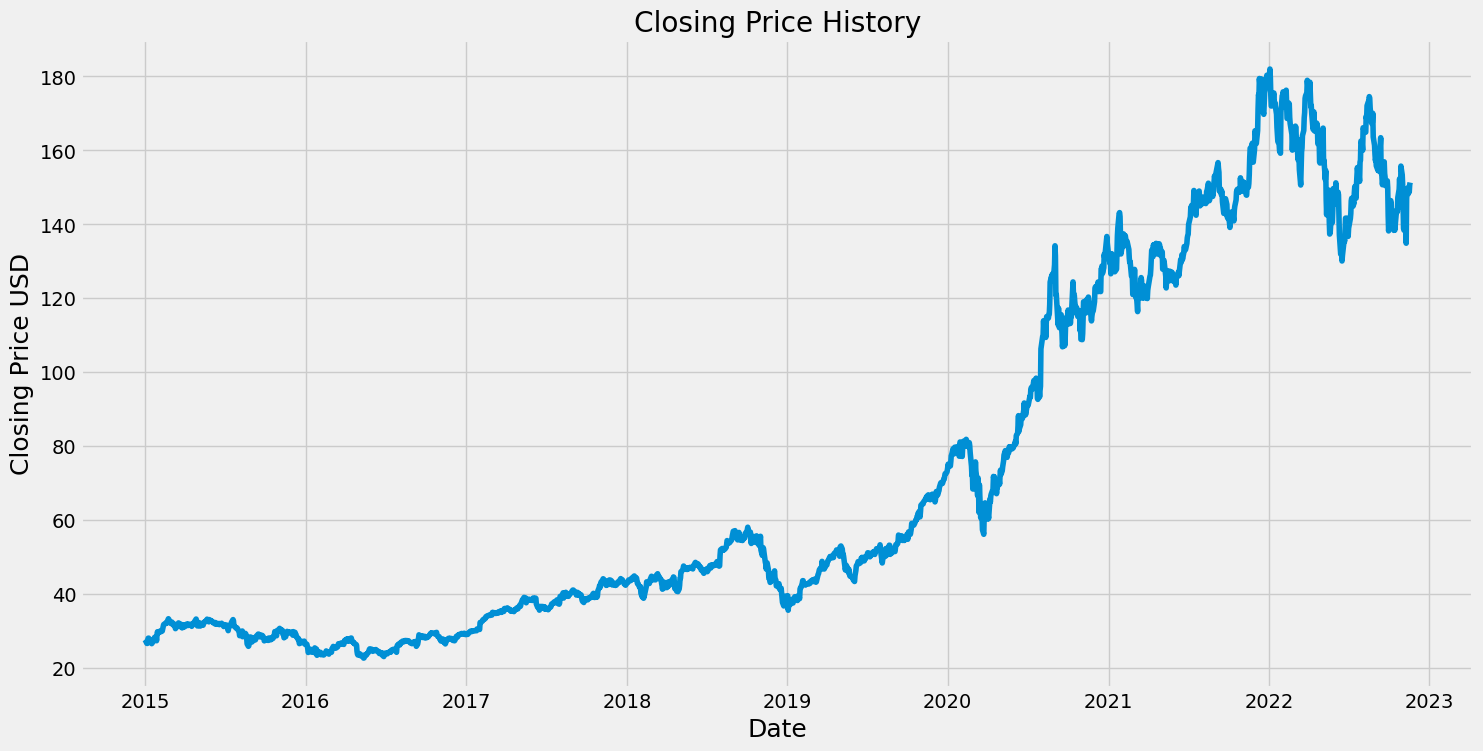

In [ ]:
plt.figure(figsize=(16,8))
plt.title('Closing Price History')
plt.plot(df['Close'])
plt.xlabel('Date',fontsize=18)
plt.ylabel('Closing Price USD',fontsize=18)
plt.show()

In [ ]:
data = df.filter(['Close'])
dataset = data.values
training_data_len = math.ceil(len(dataset) * .8)

training_data_len

1590

In [ ]:
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.03142544],
       [0.0297789 ],
       [0.02494904],
       ...,
       [0.79162614],
       [0.8037322 ],
       [0.8073075 ]])

In [ ]:
#Creating the training data set

train_data = scaled_data[0:training_data_len, :]
x_train = []
y_train = []

for i in range(60,len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i,0])
    if i <= 61:
        print(x_train)
        print(y_train)
        print()

[array([0.03142544, 0.0297789 , 0.02494904, 0.02496473, 0.02730125,
       0.03379333, 0.03398151, 0.02965345, 0.03117454, 0.03051593,
       0.02584288, 0.02454132, 0.02882234, 0.03012389, 0.03459308,
       0.0355026 , 0.03569077, 0.02948095, 0.03915635, 0.04478596,
       0.04205741, 0.04436256, 0.04439393, 0.04582092, 0.04641682,
       0.044833  , 0.04607183, 0.04967853, 0.0541634 , 0.05664106,
       0.05761331, 0.05878941, 0.06018505, 0.05976165, 0.06140819,
       0.06689667, 0.06559511, 0.06029481, 0.06285087, 0.05977734,
       0.06076525, 0.06118866, 0.05990277, 0.05656266, 0.0568606 ,
       0.05770739, 0.0535832 , 0.05002353, 0.0534891 , 0.05214051,
       0.05427317, 0.05755058, 0.05979302, 0.05827192, 0.05576291,
       0.05781716, 0.05700174, 0.0518112 , 0.0531598 , 0.05160735])]
[0.056499933265228286]

[array([0.03142544, 0.0297789 , 0.02494904, 0.02496473, 0.02730125,
       0.03379333, 0.03398151, 0.02965345, 0.03117454, 0.03051593,
       0.02584288, 0.02454132, 0.0

In [ ]:
x_train, y_train = np.array(x_train ), np.array(y_train)


In [ ]:
x_train = np.reshape(x_train,(x_train.shape[0], x_train.shape[1], 1))
x_train.shape

(1530, 60, 1)

In [ ]:
#Build the LSTM model

model = Sequential()
model.add(LSTM(50, return_sequences=True,input_shape=(x_train.shape[1],1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

In [ ]:
#Compile The Model
model.compile(optimizer='adam' , loss='mean_squared_error')

In [ ]:
#Train the model 
model.fit(x_train, y_train, batch_size=1, epochs=1)

1530/1530 [==============================] - 61s 36ms/step - loss: 0.0013


In [ ]:
#Creating the testing Dataset

test_data = scaled_data[training_data_len - 60 : , :]

x_test = []
y_test = dataset[training_data_len:, :]
for i in range (60 , len(test_data)):
    x_test.append(test_data[i-60:i,0])
    


In [ ]:
#Convert the data to a numpy array
x_test = np.array(x_test)

In [ ]:
x_test = np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))
x_test.shape

(397, 60, 1)

In [ ]:
#Get the Models Predited Price Vales 

predictions = model.predict(x_test) + 0.08*model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

13/13 [==============================] - 0s 27ms/step


In [ ]:
# GEt The RMS VAlue Root mean square value error

rmse = np.sqrt(np.mean(predictions - y_test)**2 )
rmse

1.6652491879403142

C:\Users\Aryak\AppData\Local\Temp\ipykernel_6368\445682909.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


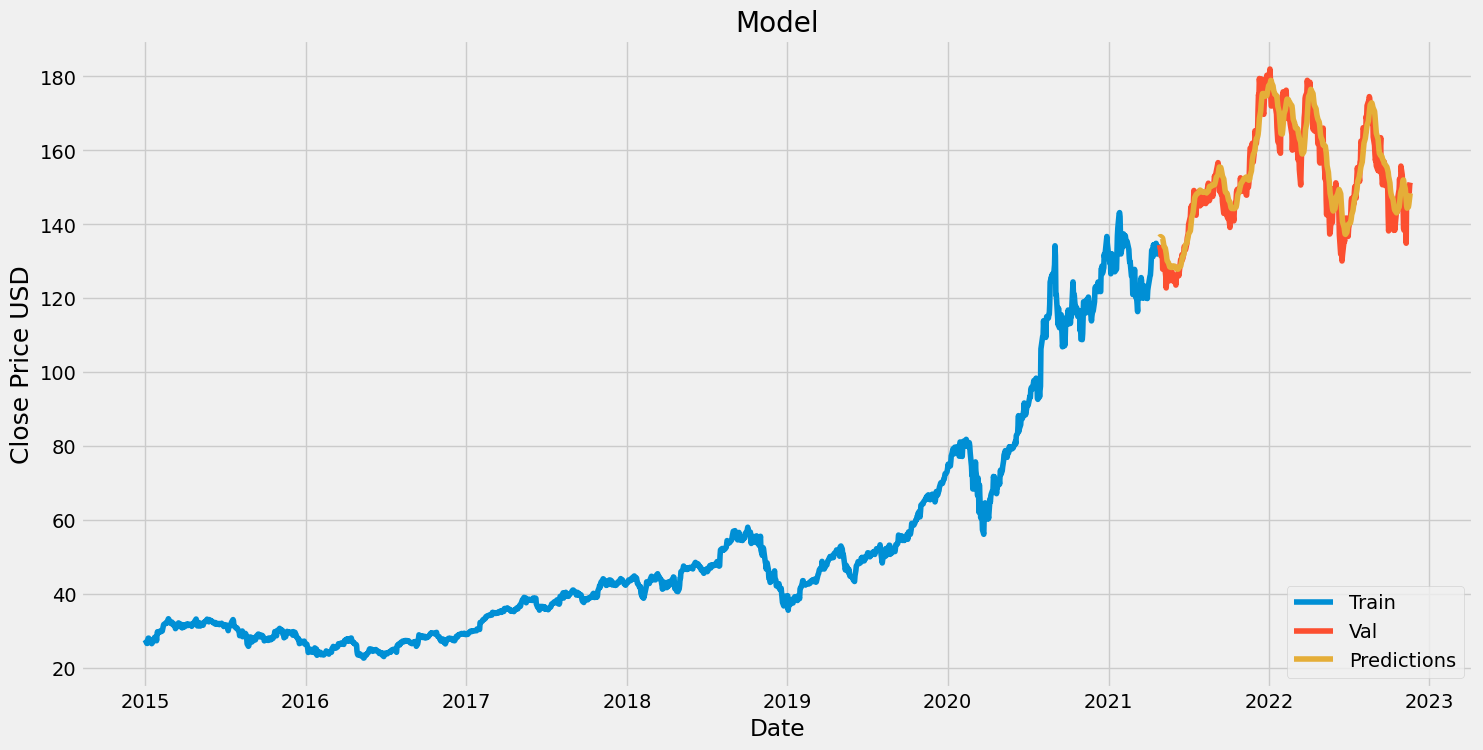

In [ ]:
#Plot Data 

train = data[: training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
plt.figure(figsize=(16,8))
plt.title("Model")
plt.xlabel('Date')
plt.ylabel('Close Price USD',fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close','Predictions']])
plt.legend(['Train','Val','Predictions'], loc='lower right')
plt.show()

In [ ]:
valid

,Close,Predictions
Date,,
2021-04-27,134.389999,136.469269
2021-04-28,133.580002,136.611084
2021-04-29,133.479996,136.654633
2021-04-30,131.460007,136.630493
2021-05-03,132.539993,136.385437
...,...,...
2022-11-14,148.279999,144.681122
2022-11-15,150.039993,145.357529
2022-11-16,148.789993,146.350967


In [ ]:
#Get the quote 
apple_quote = web.get_data_yahoo('TATAMOTORS.NS',start='2012-01-01',end='2022-11-06')
new_df =  apple_quote.filter(['Close'])
last_60_days = new_df.values
#Scaler the data between 1 and 0 
last_60_days_scaled = scaler.transform(last_60_days)
#create an empty list
xtest = []
#append the past 60 days
xtest.append(last_60_days_scaled)
#Convert the X_test data set to nuppuy array
xtest = np.array(xtest)
#reshape the array
xtest = np.reshape(xtest,(xtest.shape[0],xtest.shape[1],1))
#Get the predicted Scaled Price 
pred_price = model.predict(xtest)
#undo the scaling
pred_price = scaler.inverse_transform(pred_price)
#print the prediction
print(pred_price)

1/1 [==============================] - 0s 351ms/step
[[323.19547]]


In [ ]:
ss = web.get_data_yahoo('TATAMOTORS.NS',start='2022-11-07',end=str(now))
ss

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2022-11-07,437.500000,428.250000,428.250000,435.000000,15058076,435.000000
2022-11-09,441.200012,432.000000,439.200012,433.149994,14471443,433.149994
2022-11-10,420.549988,409.200012,420.500000,412.200012,26251660,412.200012
2022-11-11,425.500000,414.700012,420.000000,423.500000,19296401,423.500000
2022-11-14,437.700012,423.500000,424.000000,433.700012,17996083,433.700012
2022-11-15,438.500000,434.100006,434.899994,437.149994,10696024,437.149994
2022-11-16,438.200012,429.600006,436.950012,431.549988,8206169,431.549988
2022-11-17,427.549988,419.600006,422.000000,423.149994,15621809,423.149994
2022-11-18,426.450012,421.149994,424.000000,423.799988,9851962,423.799988
